## 原创+首发：公众号『 数据不吹牛 』
## 作者：小z
## 更多数据相关的有趣内容，等你来撩

In [ ]:
import os
import pandas as pd

In [178]:
os.chdir('C:\\Users\\admin\\Desktop\\data')

## 项目一

### 1.1 打开19年1月份的样例数据

In [160]:
df = pd.read_excel('不吹牛-2019-01.xlsx')
print('数据行数：{}'.format(len(df)))
df.head()

数据行数：50


,品牌,品牌搜索人数,点击人数,支付人数
0,七喜,770,590,22
1,万迅,1369,948,0
2,东方,1400,919,2
3,九方,955,531,6
4,佳禾,706,343,2


### 1.2 按品牌搜索排名

In [161]:
df = df.sort_values('品牌搜索人数',ascending = False)
df.head()

,品牌,品牌搜索人数,点击人数,支付人数
14,同兴,41000,15519,519
7,凌云,31482,19783,1627
21,思优,30225,15804,502
43,菊风,18662,12686,101
22,恒聪,12525,8102,44


### 1.3 加上排名列

In [163]:
df['搜索人数排名'] = df['品牌搜索人数'].rank(ascending = False)
df.head()

,品牌,品牌搜索人数,点击人数,支付人数,搜索人数排名
14,同兴,41000,15519,519,1.0
7,凌云,31482,19783,1627,2.0
21,思优,30225,15804,502,3.0
43,菊风,18662,12686,101,4.0
22,恒聪,12525,8102,44,5.0


### 1.4 计算搜索份额指标

In [167]:
df['搜索份额'] = df['品牌搜索人数'] / df['品牌搜索人数'].sum()
df.head()

,品牌,品牌搜索人数,点击人数,支付人数,搜索人数排名,搜索份额
14,同兴,41000,15519,519,1.0,0.182446
7,凌云,31482,19783,1627,2.0,0.140092
21,思优,30225,15804,502,3.0,0.134498
43,菊风,18662,12686,101,4.0,0.083044
22,恒聪,12525,8102,44,5.0,0.055735


### 1.5 改了需求，重点关注凌云品牌

In [168]:
brand = '凌云'
brand_data = df.loc[df['品牌'].str.find(brand) != -1,:]
brand_data

,品牌,品牌搜索人数,点击人数,支付人数,搜索人数排名,搜索份额
7,凌云,31482,19783,1627,2.0,0.140092


In [169]:
other = df.loc[df['品牌'].str.find(brand) == -1,:]
other_top5 = other.iloc[:5,:]
other_top5

,品牌,品牌搜索人数,点击人数,支付人数,搜索人数排名,搜索份额
14,同兴,41000,15519,519,1.0,0.182446
21,思优,30225,15804,502,3.0,0.134498
43,菊风,18662,12686,101,4.0,0.083044
22,恒聪,12525,8102,44,5.0,0.055735
47,银嘉,8759,5968,41,6.0,0.038977


In [171]:
data = pd.concat([brand_data,other_top5])
data

,品牌,品牌搜索人数,点击人数,支付人数,搜索人数排名,搜索份额
7,凌云,31482,19783,1627,2.0,0.140092
14,同兴,41000,15519,519,1.0,0.182446
21,思优,30225,15804,502,3.0,0.134498
43,菊风,18662,12686,101,4.0,0.083044
22,恒聪,12525,8102,44,5.0,0.055735
47,银嘉,8759,5968,41,6.0,0.038977


### 1.6 循环执行

In [42]:
result = pd.DataFrame()

for name in os.listdir():
    df = pd.read_excel(name)
    df = df.sort_values('品牌搜索人数',ascending = False)
    df['搜索人数排名'] = df['品牌搜索人数'].rank(ascending = False)
    df['搜索份额'] = df['品牌搜索人数'] / df['品牌搜索人数'].sum()
    
    brand = '凌云'
    brand_data = df.loc[df['品牌'].str.find(brand) != -1,:]
    
    other = df.loc[df['品牌'].str.find(brand) == -1,:]
    other_top5 = other.iloc[:5,:]
    data = pd.concat([brand_data,other_top5])
    data['日期'] = name[4:-5]
    
    result = pd.concat([result,data])

In [179]:
result.head(8)

,品牌,品牌搜索人数,点击人数,支付人数,搜索人数排名,搜索份额,日期
7,凌云,31482,19783,1627,2.0,0.140092,2019-01
14,同兴,41000,15519,519,1.0,0.182446,2019-01
21,思优,30225,15804,502,3.0,0.134498,2019-01
43,菊风,18662,12686,101,4.0,0.083044,2019-01
22,恒聪,12525,8102,44,5.0,0.055735,2019-01
47,银嘉,8759,5968,41,6.0,0.038977,2019-01
7,凌云,325,215,14,34.0,0.002959,2019-01
48,雨林,43581,22073,2715,1.0,0.396833,2019-01


## 项目二

### 2.1 筛选出2020年订单

In [172]:
final = pd.DataFrame()
for name in os.listdir():
    df = pd.read_excel(name)
    df['日期'] = name[4:-5]
    final = pd.concat([final,df])

final_last = final.loc[final['日期'].str.find('2020') != -1,:]

print('数据行数：{}'.format(len(final_last)))
final_last.head()

数据行数：600


,品牌,品牌搜索人数,点击人数,支付人数,日期
0,七喜,96885,46896,4692,2020-01
1,万迅,30070,21386,4393,2020-01
2,东方,354060,72224,7544,2020-01
3,九方,244846,103363,17097,2020-01
4,佳禾,6547,3257,337,2020-01


###  2.2 提取关键字段，按品牌分组

In [174]:
gp = final_last.groupby('品牌')[['品牌搜索人数','点击人数','支付人数']].sum().reset_index()
gp = gp.sort_values('品牌搜索人数',ascending = False)
gp.head()

,品牌,品牌搜索人数,点击人数,支付人数
12,双敏,1604198,571399,61244
3,九方,1552916,712139,101217
20,巨奥,1417267,512847,45790
15,商软,1002679,544392,72050
24,戴硕,920350,540284,30371


### 2.3 计算关键字段

In [175]:
gp['搜索-点击转化率'] = gp['点击人数'] / gp['品牌搜索人数']
gp['点击-支付转化率'] = gp['支付人数'] / gp['点击人数']
gp.head()

,品牌,品牌搜索人数,点击人数,支付人数,搜索-点击转化率,点击-支付转化率
12,双敏,1604198,571399,61244,0.356190,0.107183
3,九方,1552916,712139,101217,0.458582,0.142131
20,巨奥,1417267,512847,45790,0.361856,0.089286
15,商软,1002679,544392,72050,0.542937,0.132349
24,戴硕,920350,540284,30371,0.587042,0.056213


### 2.4 设置字体避免中文

In [176]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

### 2.5 TOP15搜索品牌图形绘制

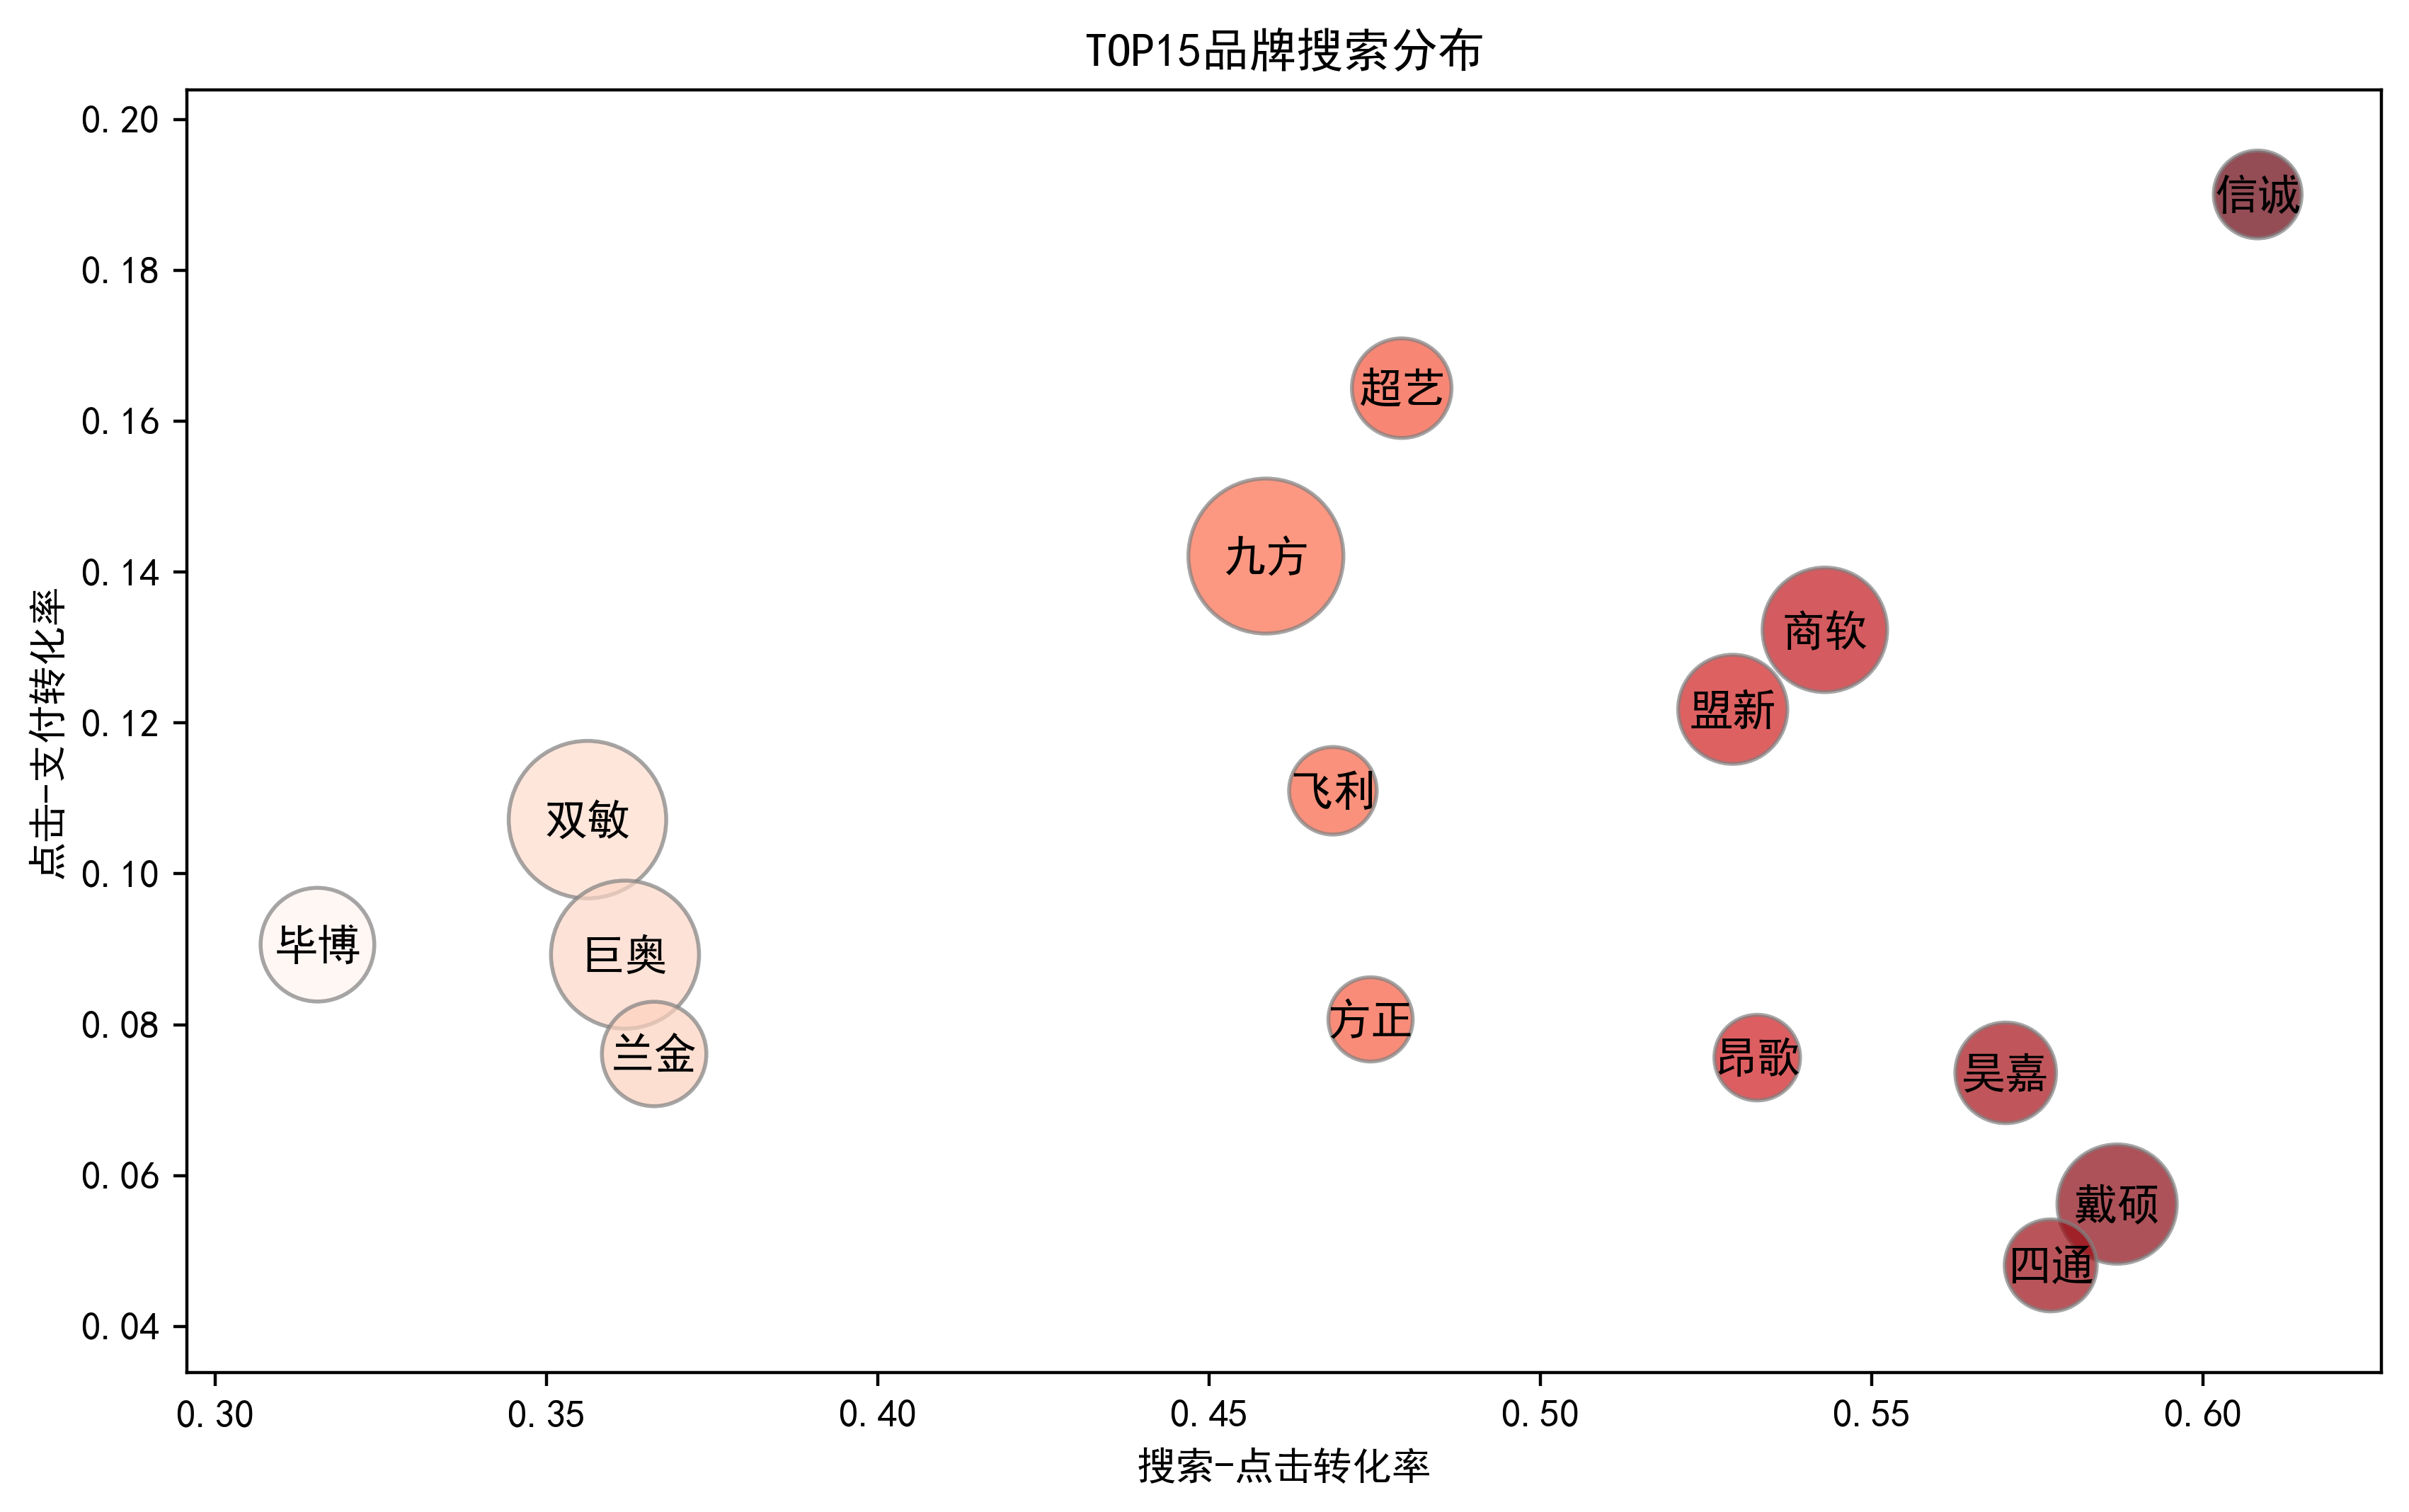

In [177]:
from matplotlib import pyplot as plt
import numpy as np


draw_data = gp.iloc[:15,:]

my_dpi=80
plt.figure(figsize=(800/my_dpi, 480/my_dpi), dpi=my_dpi * 5)
 
x = draw_data['搜索-点击转化率'].to_list()
y = draw_data['点击-支付转化率'].to_list()
z = draw_data['品牌搜索人数']
text = draw_data['品牌'].to_list()
plt.scatter(x, y, s = z / 1000, c = x, cmap = "Reds", alpha = 0.7, edgecolors = "grey", linewidth = 1)

for i,txt in enumerate(text):
    plt.text(x=x[i], y=y[i], s=txt, size=11, horizontalalignment='center', verticalalignment='center')

plt.xlabel("搜索-点击转化率")
plt.ylabel("点击-支付转化率")
plt.title("TOP15品牌搜索分布")

plt.show()